In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv(r"D:\UofT\Data Analytics Boot Camp\Final Project\GitFolder\Data-Analytics-Boot-Camp---Final-Project\Datasets\cleaned_selected_data.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Ontario_Emigrants_International_Change_Rate,Ontario_In_migrant_Interprovincial_Change_Rate,Ontario_Out_migrant_Interprovincial_Change_Rate,UT_Graduate_Enrolment_Change_Rate,UT_Undergraduate_Enrolment_Change_Rate,Ryerson_Total_Enrolment_Change_Rate,York_Total_Enrolment_Change_Rate,Toronto_population_Change_Rate,Sales_Total_Change_Rate,Avg_Price_Month_Change_Rate
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,-0.174004,0.138135,0.054456,0.0,0.0,0.0,0.0,0.002472,0.386364,0.022788
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,0.102189,0.101048,0.098702,0.0,0.0,0.0,0.0,0.002166,0.263661,0.007819
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,0.396425,0.092984,0.151916,0.0,0.0,0.0,0.0,0.002325,-0.096216,-0.008740
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,0.485221,0.074435,0.173189,0.0,0.0,0.0,0.0,0.002177,0.145933,0.009777


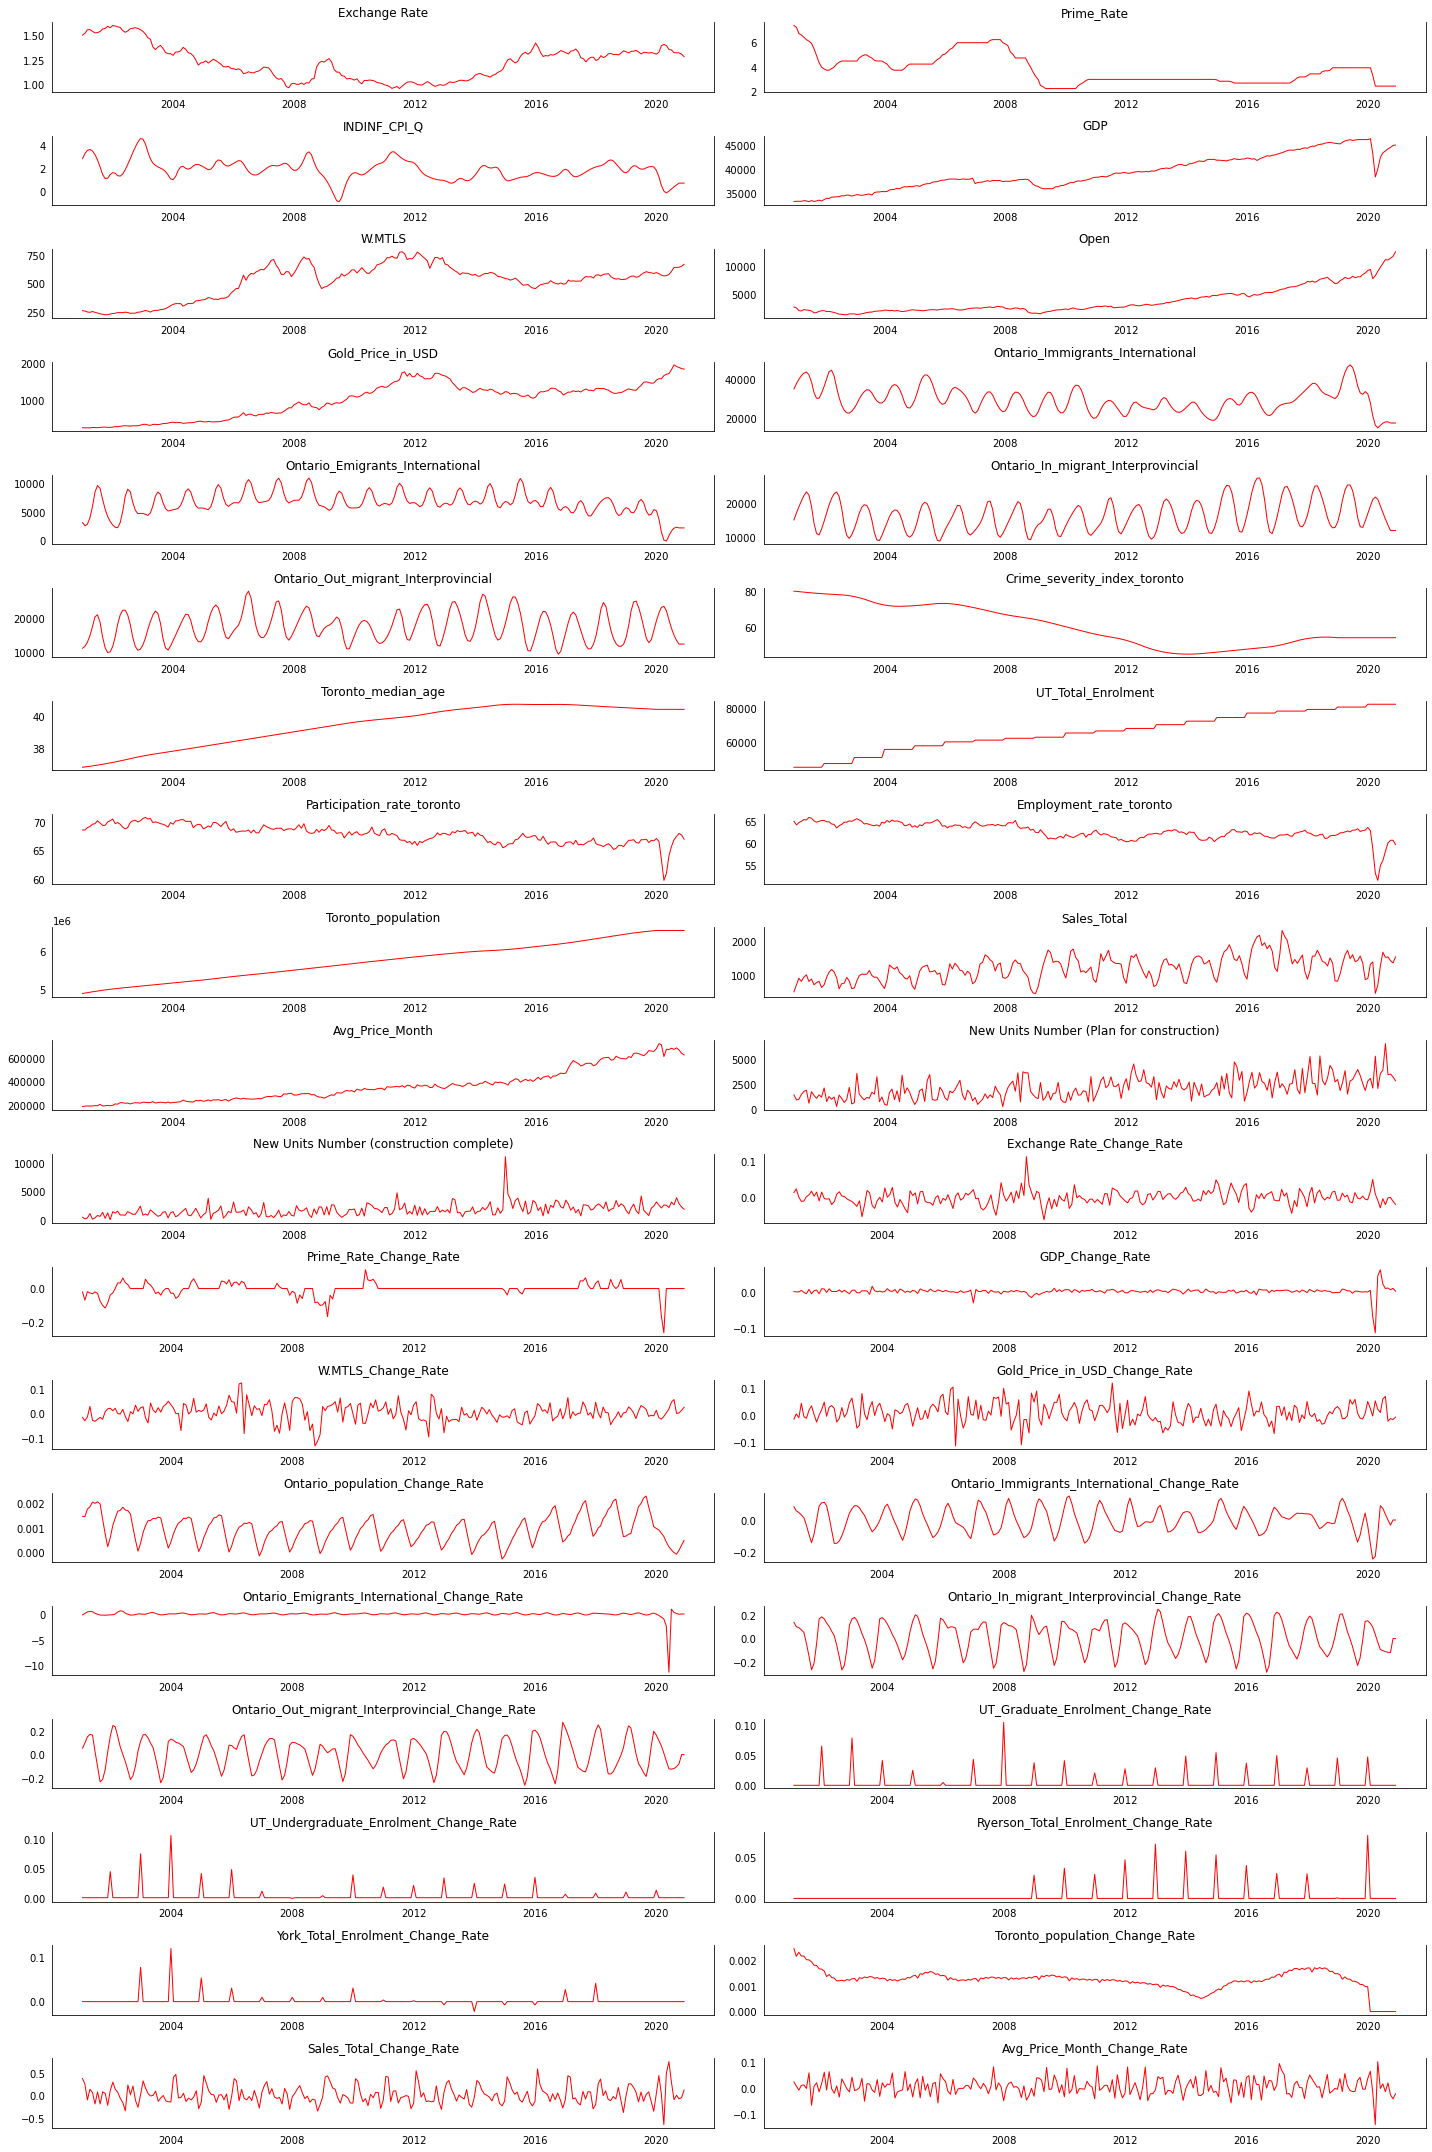

In [4]:
# Plot
fig, axes = plt.subplots(nrows=19, ncols=2, figsize=(20,30))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
for col in df.columns:
    if "Change_Rate" in col:
        df.drop(columns=[col], inplace=True)

In [6]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261,68.6,65.0,4882618.000,528,185757.6686,1457,511
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261,68.6,64.2,4894687.054,732,189990.7036,946,227
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261,69.0,64.7,4905287.460,925,191476.2205,1015,387
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261,69.2,65.0,4916690.735,836,189802.6914,1503,1151
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261,69.6,65.4,4927393.091,958,191658.3372,1810,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,1.323456,2.450,0.380368,43904.52149,641.6550,11188.406810,1966.617619,17844.25527,2164.615160,15412.26311,...,54.180000,40.400000,82311,66.9,58.2,6555205.000,1536,673173.9453,6618,2689
2020-09-01,1.321741,2.450,0.548652,44363.54588,642.2860,11119.767620,1922.101364,17850.99984,2346.044135,13622.70035,...,54.180000,40.400000,82311,67.5,60.1,6555205.000,1549,686191.4216,3490,3922
2020-10-01,1.321338,2.450,0.700000,44628.00813,644.0925,11455.091750,1897.330909,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311,68.0,60.7,6555205.000,1438,668160.6273,3550,2872


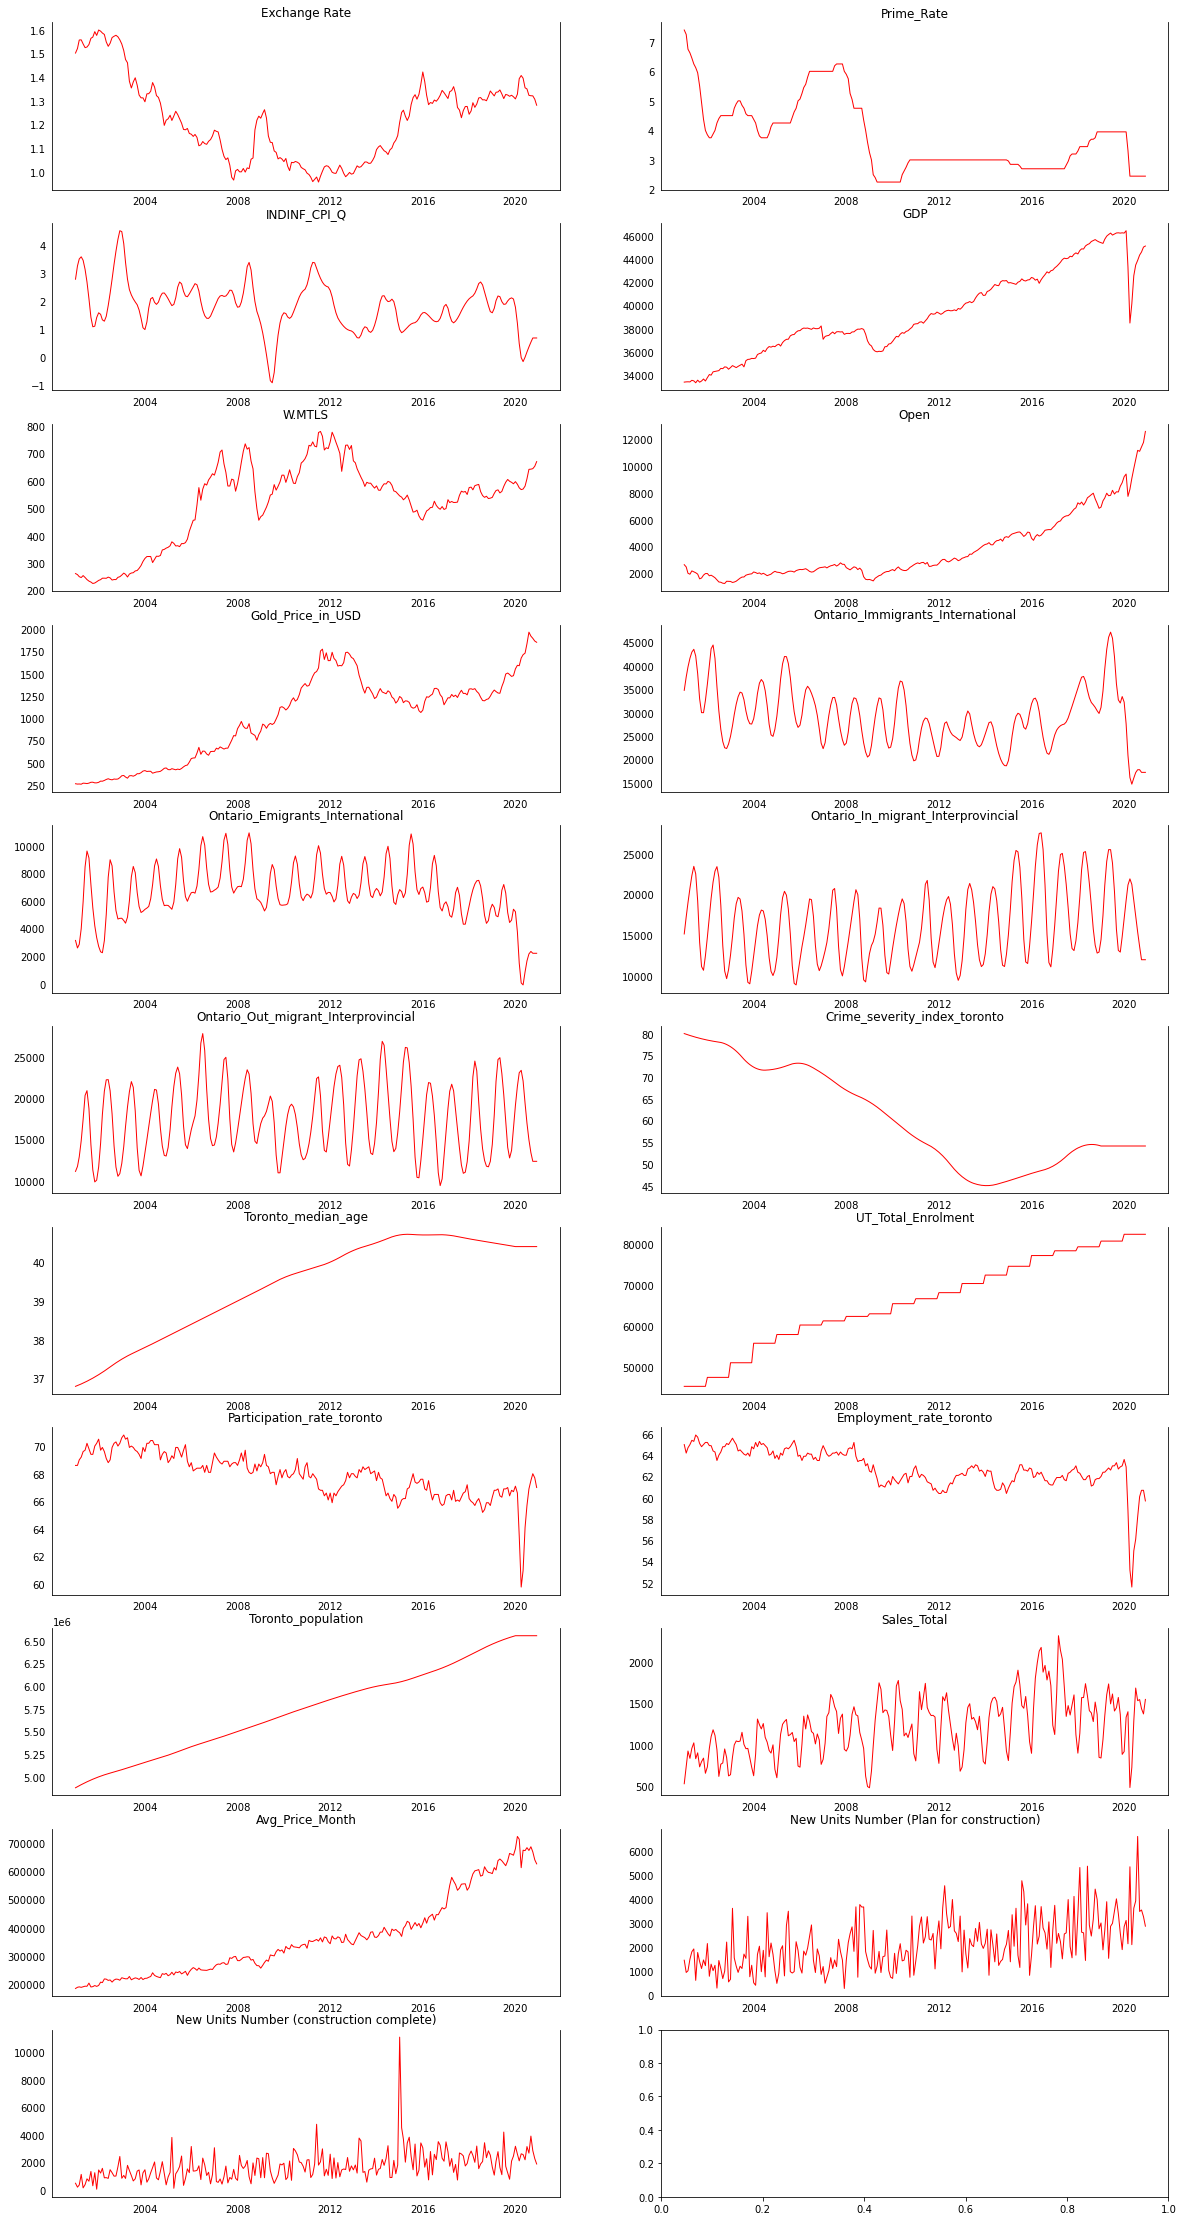

In [7]:
try:
    # Plot
    fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(20,40))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
    #     ax.tick_params(labelsize=6)

    plt.tight_layout();
    
except:
    pass


In [8]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

In [9]:
# df_target = pd.DataFrame()
# df_target["Avg_Price_Month"] = df["Avg_Price_Month"]
# df.drop(columns = ["Avg_Price_Month"], inplace=True)

In [10]:
# df_scaled = StandardScaler().fit_transform(df)
# print(df_scaled[0:5])

In [11]:
# pca = PCA(n_components=8)

In [12]:
# df_pca = pca.fit_transform(df_scaled)

In [13]:
# df_pca_fit = pd.DataFrame(data = df_pca)
# df_pca_fit.head()

In [14]:
# pca.explained_variance_ratio_

In [15]:
# df_target["Avg_Price_Month"]

In [16]:
# df_pca_fit.index = df_target.index

In [17]:
# df_pca_fit["Avg_Price_Month"] = df_target["Avg_Price_Month"]

In [18]:
# df_pca_fit

In [19]:
# try:
#     # Plot
#     fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,30))
#     for i, ax in enumerate(axes.flatten()):
#         data = df_pca_fit[df_pca_fit.columns[i]]
#         ax.plot(data, color='red', linewidth=1)
#         # Decorations
#         ax.set_title(df_pca_fit.columns[i])
#         ax.xaxis.set_ticks_position('none')
#         ax.yaxis.set_ticks_position('none')
#         ax.spines["top"].set_alpha(0)
#     #     ax.tick_params(labelsize=6)

#     plt.tight_layout();
# except:
#     pass

In [20]:
# df = df_pca_fit.copy()

In [21]:
df

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.502559,7.400,2.800000,33393.91068,262.1820,2641.687163,265.296667,34801.00000,3144.000000,15176.00000,...,80.040000,36.800000,45261,68.6,65.0,4882618.000,528,185757.6686,1457,511
2001-02-01,1.521981,7.250,3.274302,33414.60595,258.2500,2474.819966,261.310800,37662.09142,2596.931225,17272.33196,...,79.883354,36.820147,45261,68.6,64.2,4894687.054,732,189990.7036,946,227
2001-03-01,1.557832,6.750,3.523191,33421.15412,250.7975,1999.363187,262.573929,39796.62476,2862.309003,19017.66529,...,79.746533,36.839195,45261,69.0,64.7,4905287.460,925,191476.2205,1015,387
2001-04-01,1.558629,6.625,3.600000,33411.95797,247.6000,1929.581512,260.073810,41662.00000,3997.000000,20786.00000,...,79.600220,36.861226,45261,69.2,65.0,4916690.735,836,189802.6914,1503,1151
2001-05-01,1.541287,6.450,3.475476,33549.86515,254.8020,2178.740467,271.755600,42969.07156,5936.427697,22333.20337,...,79.463797,36.883489,45261,69.6,65.4,4927393.091,958,191658.3372,1810,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,1.323456,2.450,0.380368,43904.52149,641.6550,11188.406810,1966.617619,17844.25527,2164.615160,15412.26311,...,54.180000,40.400000,82311,66.9,58.2,6555205.000,1536,673173.9453,6618,2689
2020-09-01,1.321741,2.450,0.548652,44363.54588,642.2860,11119.767620,1922.101364,17850.99984,2346.044135,13622.70035,...,54.180000,40.400000,82311,67.5,60.1,6555205.000,1549,686191.4216,3490,3922
2020-10-01,1.321338,2.450,0.700000,44628.00813,644.0925,11455.091750,1897.330909,17281.00000,2212.000000,12011.00000,...,54.180000,40.400000,82311,68.0,60.7,6555205.000,1438,668160.6273,3550,2872


In [22]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [str(var) + '_x' for var in variables]
    df.index = [str(var) + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,Exchange Rate_x,Prime_Rate_x,INDINF_CPI_Q_x,GDP_x,W.MTLS_x,Open_x,Gold_Price_in_USD_x,Ontario_Immigrants_International_x,Ontario_Emigrants_International_x,Ontario_In_migrant_Interprovincial_x,...,Crime_severity_index_toronto_x,Toronto_median_age_x,UT_Total_Enrolment_x,Participation_rate_toronto_x,Employment_rate_toronto_x,Toronto_population_x,Sales_Total_x,Avg_Price_Month_x,New Units Number (Plan for construction)_x,New Units Number (construction complete)_x
Exchange Rate_y,1.0000,0.5013,0.4742,0.0583,0.3858,0.1400,0.0632,0.2116,0.3156,0.0342,...,0.0773,0.1685,0.2775,0.1388,0.3840,0.0672,0.3005,0.2662,0.0607,0.0240
Prime_Rate_y,0.0144,1.0000,0.0000,0.0256,0.0377,0.0000,0.0333,0.0001,0.0058,0.0714,...,0.0230,0.0000,0.1247,0.2038,0.0236,0.0000,0.0044,0.0006,0.0139,0.2971
INDINF_CPI_Q_y,0.0767,0.0059,1.0000,0.0212,0.0047,0.0194,0.0059,0.1088,0.2649,0.5549,...,0.0097,0.0135,0.0183,0.0129,0.0078,0.0070,0.3301,0.0211,0.0205,0.3577
GDP_y,0.0652,0.0064,0.0005,1.0000,0.2711,0.0000,0.0969,0.0000,0.0032,0.1411,...,0.0206,0.0000,0.0001,0.0000,0.0000,0.0000,0.0250,0.0000,0.0052,0.0902
W.MTLS_y,0.2998,0.4796,0.1119,0.4981,1.0000,0.5420,0.1288,0.0821,0.0987,0.1813,...,0.3152,0.4124,0.4179,0.5525,0.1466,0.5607,0.0606,0.5783,0.0683,0.4334
Open_y,0.2329,0.0051,0.0056,0.0000,0.2906,1.0000,0.0210,0.0000,0.0015,0.0473,...,0.5276,0.0000,0.5670,0.0223,0.0000,0.0000,0.3029,0.0013,0.2708,0.0123
Gold_Price_in_USD_y,0.6526,0.1313,0.3517,0.0012,0.0670,0.2291,1.0000,0.5496,0.0170,0.4805,...,0.1289,0.0948,0.2271,0.0329,0.0021,0.0018,0.0202,0.0800,0.0724,0.1602
Ontario_Immigrants_International_y,0.0001,0.0000,0.1048,0.0048,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0017,0.0000,0.0000,0.0000,0.1010,0.0608,0.0036
Ontario_Emigrants_International_y,0.0000,0.0034,0.0000,0.0000,0.0049,0.0000,0.0144,0.0000,1.0000,0.0000,...,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011,0.0613
Ontario_In_migrant_Interprovincial_y,0.0003,0.0228,0.6039,0.0000,0.2619,0.0000,0.0110,0.0000,0.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0033,0.0000,0.0000,0.0000,0.0000,0.0016


In [23]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Exchange Rate ::  2241.28   > nan       =>   False
Prime_Rate ::  1946.4    > nan       =>   False
INDINF_CPI_Q ::  1683.61   > nan       =>   False
GDP    ::  1474.77   > nan       =>   False
W.MTLS ::  1296.81   > nan       =>   False
Open   ::  1127.25   > nan       =>   False
Gold_Price_in_USD ::  975.02    > nan       =>   False
Ontario_Immigrants_International ::  838.26    > nan       =>   False
Ontario_Emigrants_International ::  717.76    > nan       =>   False
Ontario_In_migrant_Interprovincial ::  605.28    > 311.1288  =>   True
Ontario_Out_migrant_Interprovincial ::  507.64    > 263.2603  =>   True
Crime_severity_index_toronto ::  424.9     > 219.4051  =>   True
Toronto_median_age ::  347.51    > 179.5199  =>   True
UT_Total_Enrolment ::  276.89    > 143.6691  =>   True
Participation_rate_toronto ::  214.89    > 111.7797  =>   True
Employment_rate_toronto ::  158.62    > 83.9383   =>   

C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:579: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


In [24]:
nobs = 72
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape)  

(168, 21)
(72, 21)


In [25]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [26]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Exchange Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8273
 No. Lags Chosen       = 1
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.367. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2521
 No. Lags Chosen       = 5
 Critical value 1%     = -3.471
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.1879. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothes

In [27]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [28]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Exchange Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0355
 No. Lags Chosen       = 0
 Critical value 1%     = -3.47
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8638
 No. Lags Chosen       = 4
 Critical value 1%     = -3.471
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0023. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signi

In [29]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [30]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Exchange Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.3853
 No. Lags Chosen       = 8
 Critical value 1%     = -3.473
 Critical value 5%     = -2.88
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Prime_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.6496
 No. Lags Chosen       = 5
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "INDINF_CPI_Q" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

    Augmented Dickey-Fuller Test on "New Units Number (construction complete)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.0004
 No. Lags Chosen       = 13
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [31]:
df_differenced

,Exchange Rate,Prime_Rate,INDINF_CPI_Q,GDP,W.MTLS,Open,Gold_Price_in_USD,Ontario_Immigrants_International,Ontario_Emigrants_International,Ontario_In_migrant_Interprovincial,...,Crime_severity_index_toronto,Toronto_median_age,UT_Total_Enrolment,Participation_rate_toronto,Employment_rate_toronto,Toronto_population,Sales_Total,Avg_Price_Month,New Units Number (Plan for construction),New Units Number (construction complete)
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-01,0.016429,-0.350,-0.225413,-14.14710,-3.5205,-308.589582,5.248995,-726.55808,812.446553,-350.99863,...,0.019826,-0.001099,0.0,0.4,1.3,-1468.648,-11.0,-2747.5181,580.0,444.0
2001-04-01,-0.035054,0.375,-0.172080,-15.74432,4.2550,405.675104,-3.763248,-269.15810,869.313219,23.00138,...,-0.009493,0.002983,0.0,-0.2,-0.2,802.869,-282.0,-3159.0460,419.0,604.0
2001-05-01,-0.018139,-0.050,-0.201333,147.10333,10.3995,318.940630,14.181910,-558.30368,804.736700,-221.13134,...,0.009889,0.000232,0.0,0.2,0.1,-700.919,211.0,3529.1749,-181.0,-1740.0
2001-06-01,0.001616,-0.025,-0.200244,-187.11033,-14.0915,-317.235121,-13.200467,-699.06086,609.095945,-398.99068,...,0.000794,0.001716,0.0,-0.3,-0.5,12.572,-56.0,386.3656,-189.0,1212.0
2001-07-01,0.018321,0.075,-0.125941,-114.51489,-0.7705,-3.424340,-1.581323,-2033.09296,-1401.474981,-2069.62875,...,0.009545,0.000169,0.0,0.4,0.7,-678.715,-258.0,-2628.9393,-1429.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,0.030516,0.000,0.090213,45.05923,-12.8545,-90.657496,-50.574491,304.45023,-1413.390559,-1217.82162,...,0.017454,0.000008,0.0,-0.6,0.2,134.158,-132.0,3463.7132,-2475.0,-3224.0
2014-09-01,-0.011756,0.000,0.055289,362.66667,-7.6840,71.181636,-35.008559,373.84894,-1116.110039,-786.25235,...,0.002601,-0.002102,0.0,0.2,0.1,358.020,215.0,32708.9931,1480.0,2308.0
2014-10-01,0.013185,0.000,-0.157741,-234.62369,-9.4045,-246.940198,34.154590,392.50288,811.210850,1518.93990,...,-0.001667,-0.002580,0.0,0.7,0.5,226.109,47.0,-29681.7597,-85.0,1234.0


In [32]:
model = VAR(df_differenced)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  124.77487332212783
BIC :  133.47152064904947
FPE :  1.5981105400295697e+54
HQIC:  128.30514490575575 

Lag Order = 2
AIC :  121.2272206451449
BIC :  138.2953876227379
FPE :  5.789777650665459e+52
HQIC:  128.15625182727206 

Lag Order = 3
AIC :  117.93741751875082
BIC :  143.44662162847038
FPE :  4.225821772763752e+51
HQIC:  128.29387481328914 

Lag Order = 4
AIC :  114.8208136313941
BIC :  148.84155102886203
FPE :  8.42971661262028e+50
HQIC:  128.63374934716006 

Lag Order = 5
AIC :  107.04043286156201
BIC :  149.64419756004284
FPE :  7.709084366605606e+48
HQIC:  124.33929199833747 



C:\Users\Jesse_Desktop\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [33]:
x = model.select_order(maxlags=6)
x.summary()

,AIC,BIC,FPE,HQIC
0,132.6,133.0*,3.941e+57,132.8
1,124.6,133.4,1.301e+54,128.2
2,121.1,138.5,5.318e+52,128.2
3,117.8,143.7,4.006e+51,128.3
4,114.6,148.9,7.703e+50,128.6
5,106.6,149.4,5.779e+48,124.0
6,94.72*,146.0,2.419e+46*,115.5*


In [34]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 03, Jun, 2021
Time:                     00:53:59
--------------------------------------------------------------------
No. of Equations:         21.0000    BIC:                    149.644
Nobs:                     161.000    HQIC:                   124.339
Log likelihood:          -11188.2    FPE:                7.70908e+48
AIC:                      107.040    Det(Omega_mle):     1.87763e+44
--------------------------------------------------------------------
Results for equation Exchange Rate
                                                 coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------------------
const                                               0.000089         0.002127            0.042           0.966
L1.Exchange Rate                           

In [35]:
def adjust(val, length= 6): return str(val).ljust(length)

In [36]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Exchange Rate : 2.12
Prime_Rate : 1.98
INDINF_CPI_Q : 2.28
GDP    : 1.89
W.MTLS : 1.99
Open   : 1.9
Gold_Price_in_USD : 1.83
Ontario_Immigrants_International : 1.88
Ontario_Emigrants_International : 1.94
Ontario_In_migrant_Interprovincial : 2.01
Ontario_Out_migrant_Interprovincial : 1.9
Crime_severity_index_toronto : 2.02
Toronto_median_age : 1.87
UT_Total_Enrolment : 1.75
Participation_rate_toronto : 1.9
Employment_rate_toronto : 2.04
Toronto_population : 1.81
Sales_Total : 1.79
Avg_Price_Month : 2.08
New Units Number (Plan for construction) : 1.92
New Units Number (construction complete) : 2.07


In [37]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

5


array([[ 3.05162870e-02,  0.00000000e+00,  9.02129130e-02,
         4.50592300e+01, -1.28545000e+01, -9.06574960e+01,
        -5.05744910e+01,  3.04450230e+02, -1.41339056e+03,
        -1.21782162e+03, -4.14658100e+01,  1.74535700e-02,
         7.76000000e-06,  0.00000000e+00, -6.00000000e-01,
         2.00000000e-01,  1.34158000e+02, -1.32000000e+02,
         3.46371320e+03, -2.47500000e+03, -3.22400000e+03],
       [-1.17558360e-02,  0.00000000e+00,  5.52887880e-02,
         3.62666670e+02, -7.68400000e+00,  7.11816360e+01,
        -3.50085590e+01,  3.73848940e+02, -1.11611004e+03,
        -7.86252350e+02,  2.79415280e+02,  2.60079000e-03,
        -2.10178000e-03,  0.00000000e+00,  2.00000000e-01,
         1.00000000e-01,  3.58020000e+02,  2.15000000e+02,
         3.27089931e+04,  1.48000000e+03,  2.30800000e+03],
       [ 1.31847850e-02,  0.00000000e+00, -1.57741227e-01,
        -2.34623690e+02, -9.40450000e+00, -2.46940198e+02,
         3.41545900e+01,  3.92502880e+02,  8.11210850e

In [38]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Exchange Rate_2d,Prime_Rate_2d,INDINF_CPI_Q_2d,GDP_2d,W.MTLS_2d,Open_2d,Gold_Price_in_USD_2d,Ontario_Immigrants_International_2d,Ontario_Emigrants_International_2d,Ontario_In_migrant_Interprovincial_2d,...,Crime_severity_index_toronto_2d,Toronto_median_age_2d,UT_Total_Enrolment_2d,Participation_rate_toronto_2d,Employment_rate_toronto_2d,Toronto_population_2d,Sales_Total_2d,Avg_Price_Month_2d,New Units Number (Plan for construction)_2d,New Units Number (construction complete)_2d
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.013658,-0.069485,0.100478,360.096482,-31.619966,-59.388305,42.150623,447.198282,-626.017224,-994.467712,...,-0.017617,-0.000593,1969.067490,0.727215,0.787519,487.815420,84.447971,17488.234773,-3088.103711,-1522.578306
2015-02-01,0.016499,0.056053,0.033952,-331.742472,-6.851242,69.201391,-127.385124,-60.923523,-918.270701,-1737.621278,...,-0.016657,-0.001394,-2808.430032,0.366359,-0.256109,-188.278794,189.394949,-11537.804717,5096.770567,1798.066798
2015-03-01,-0.051171,0.026070,-0.098552,28.297861,44.743165,6.505722,95.739912,-538.254127,-477.501850,-1386.782457,...,-0.007527,-0.001473,1352.675971,-1.706397,-0.632952,-144.758226,115.950694,24256.147268,-3347.329093,-2146.126024
2015-04-01,0.052440,-0.037839,-0.249297,145.051411,4.121139,12.750355,-44.226758,-804.592371,894.661271,619.645541,...,-0.011814,0.001079,-1620.221966,1.261978,0.499534,311.033419,-232.848306,-26660.971859,1881.086948,1267.304512
2015-05-01,-0.024907,0.053926,-0.015987,-115.974429,-2.500821,-12.574542,62.465411,-415.567076,1129.572928,1424.677971,...,0.009153,-0.001064,1206.478636,-0.008537,-0.293105,-302.377801,-218.580002,5346.959261,-2496.186203,1233.664617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.003779,0.000933,-0.001120,53.470714,3.242859,-10.064459,-3.185010,212.411095,-1009.523167,-1125.555429,...,0.000405,0.000265,-430.815252,0.054789,0.084980,79.006500,141.346736,3570.414145,738.201467,125.639138
2020-09-01,-0.008602,-0.015805,-0.010447,23.422531,-1.371072,13.684541,-6.383114,42.126837,-379.415118,-298.536113,...,0.008164,-0.000737,-218.850863,-0.075578,-0.038580,-185.766346,72.849580,4381.582366,-681.669343,95.808076
2020-10-01,0.005129,0.017409,-0.011558,-56.771663,-5.330666,2.009789,-14.264725,-84.437525,883.733011,1171.123113,...,0.000761,0.000135,-284.078332,0.065236,0.016042,59.378402,-83.824726,-4705.610569,447.464739,203.361733


In [39]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [40]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

,Exchange Rate_2d,Prime_Rate_2d,INDINF_CPI_Q_2d,GDP_2d,W.MTLS_2d,Open_2d,Gold_Price_in_USD_2d,Ontario_Immigrants_International_2d,Ontario_Emigrants_International_2d,Ontario_In_migrant_Interprovincial_2d,...,Toronto_population_1d,Toronto_population_forecast,Sales_Total_1d,Sales_Total_forecast,Avg_Price_Month_1d,Avg_Price_Month_forecast,New Units Number (Plan for construction)_1d,New Units Number (Plan for construction)_forecast,New Units Number (construction complete)_1d,New Units Number (construction complete)_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.013658,-0.069485,0.100478,360.096482,-31.619966,-59.388305,42.150623,447.198282,-626.017224,-994.467712,...,4975.908420,6.045225e+06,-190.552029,733.447971,10874.803073,398486.389673,-2883.103711,-764.103711,-891.578306,938.421694
2015-02-01,0.016499,0.056053,0.033952,-331.742472,-6.851242,69.201391,-127.385124,-60.923523,-918.270701,-1737.621278,...,4787.629627,6.050013e+06,-1.157080,732.290891,-663.001644,397823.388028,2213.666855,1449.563144,906.488492,1844.910186
2015-03-01,-0.051171,0.026070,-0.098552,28.297861,44.743165,6.505722,95.739912,-538.254127,-477.501850,-1386.782457,...,4642.871401,6.054656e+06,114.793614,847.084504,23593.145623,421416.533651,-1133.662238,315.900906,-1239.637532,605.272654
2015-04-01,0.052440,-0.037839,-0.249297,145.051411,4.121139,12.750355,-44.226758,-804.592371,894.661271,619.645541,...,4953.904820,6.059610e+06,-118.054693,729.029812,-3067.826236,418348.707416,747.424710,1063.325616,27.666980,632.939634
2015-05-01,-0.024907,0.053926,-0.015987,-115.974429,-2.500821,-12.574542,62.465411,-415.567076,1129.572928,1424.677971,...,4651.527018,6.064261e+06,-336.634694,392.395117,2279.133025,420627.840441,-1748.761493,-685.435877,1261.331597,1894.271230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.003779,0.000933,-0.001120,53.470714,3.242859,-10.064459,-3.185010,212.411095,-1009.523167,-1125.555429,...,2681.736354,6.284214e+06,-140.697742,-11010.353554,3835.323340,581907.471097,399.737795,-9040.021089,-66.705336,1644.583366
2020-09-01,-0.008602,-0.015805,-0.010447,23.422531,-1.371072,13.684541,-6.383114,42.126837,-379.415118,-298.536113,...,2495.970008,6.286710e+06,-67.848162,-11078.201716,8216.905706,590124.376803,-281.931549,-9321.952637,29.102740,1673.686107
2020-10-01,0.005129,0.017409,-0.011558,-56.771663,-5.330666,2.009789,-14.264725,-84.437525,883.733011,1171.123113,...,2555.348411,6.289266e+06,-151.672888,-11229.874604,3511.295137,593635.671940,165.533190,-9156.419447,232.464473,1906.150580


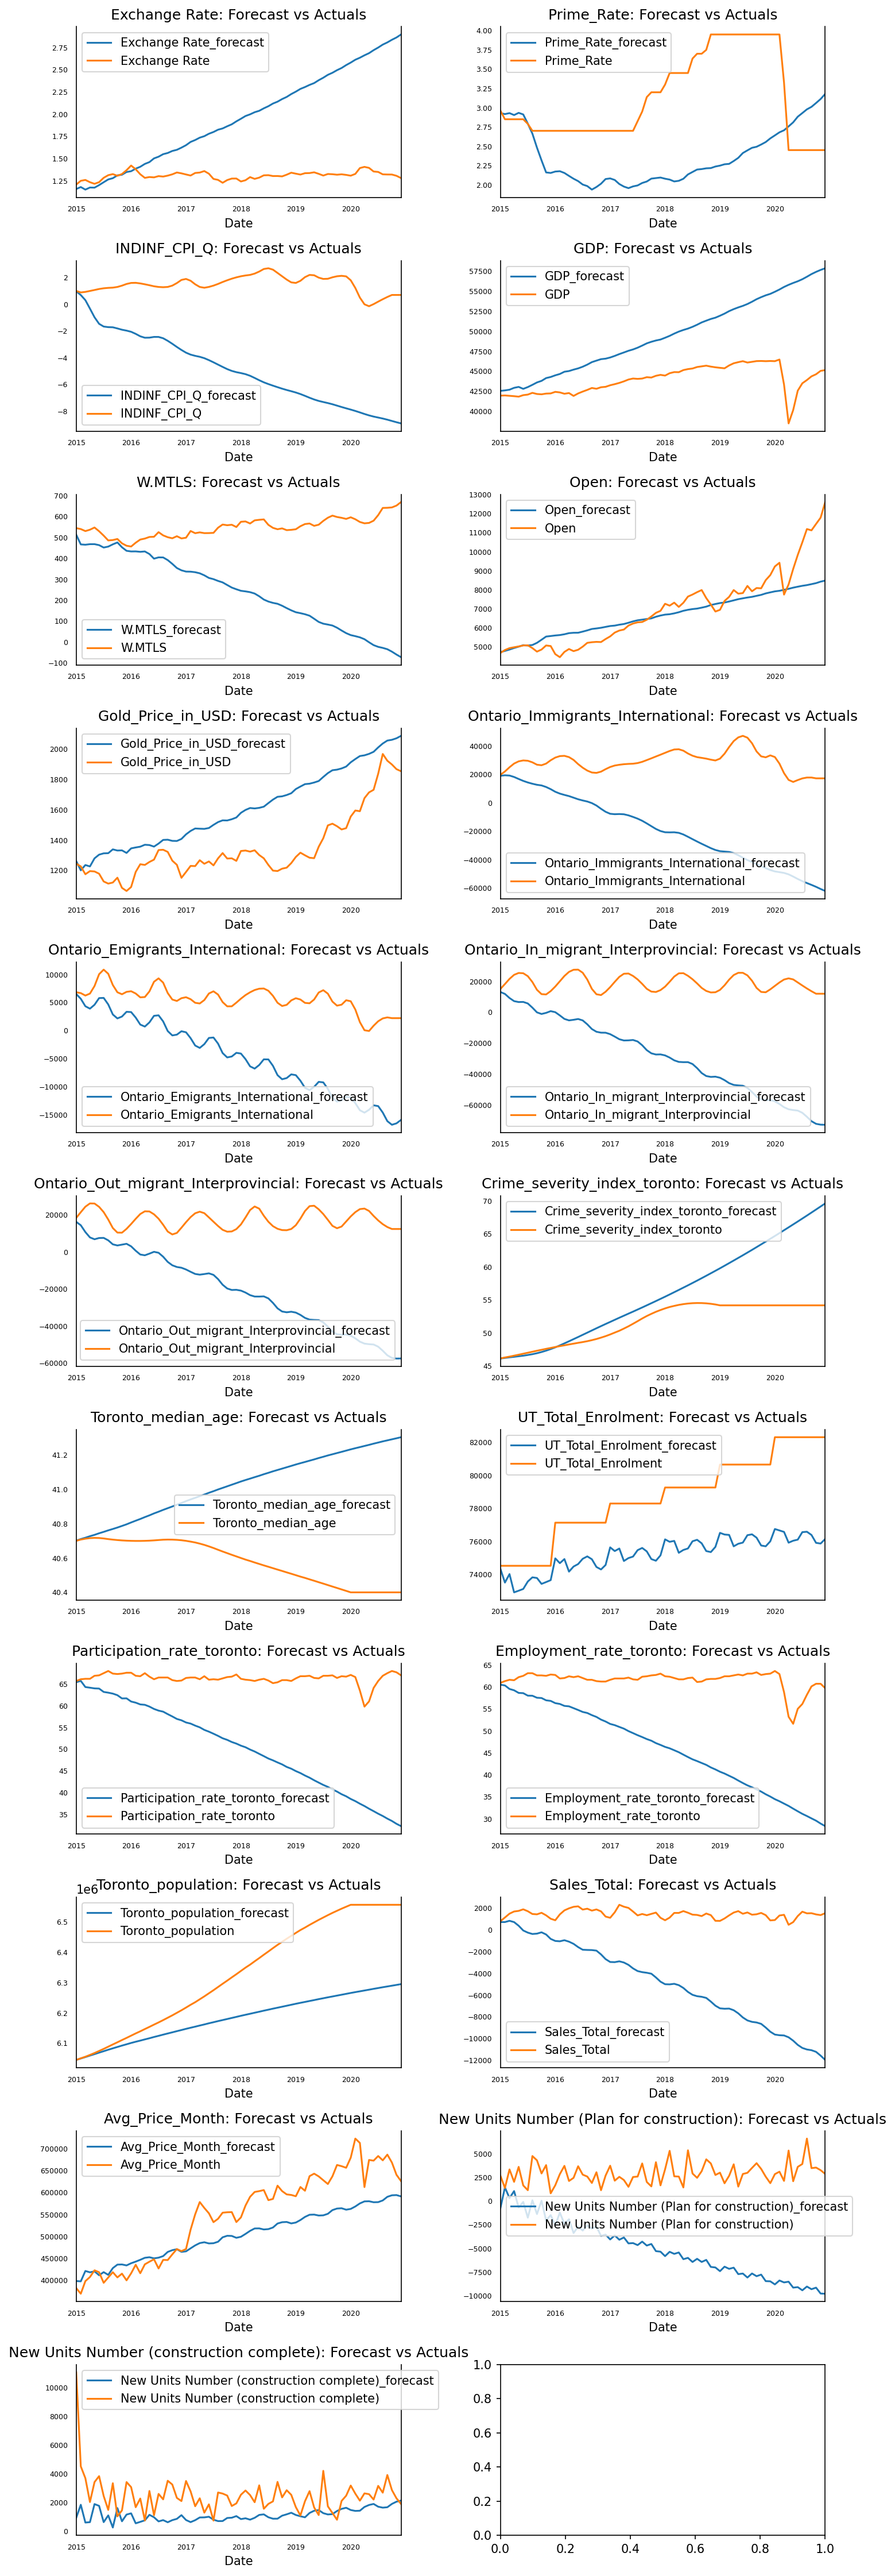

In [41]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2+1), ncols=2, dpi=150, figsize=(10,30))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[str(col)+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(str(col) + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();